In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

path = os.getcwd()
df_test = pd.read_csv(path + '/test.csv')
df_train = pd.read_csv(path + '/train.csv')

df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [2]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h1> Data Overview </h1>

In [3]:
#dimension
print('Dimension of Test Data ', df_test.shape)
print('Dimension of Train Data', df_train.shape)

Dimension of Test Data  (367, 12)
Dimension of Train Data (614, 13)


In [4]:
#data type
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
#missing value
def missing_data(data):
    df_train_missing = pd.DataFrame(data.isna().sum())
    df_train_missing.reset_index(level = 0, inplace = True)
    df_train_missing.columns = ['Column Name', 'Total Missing Values']
    df_train_missing = df_train_missing.sort_values(by = 'Total Missing Values', ascending = False)
    return df_train_missing

missing_data(df_train)

,Column Name,Total Missing Values
10,Credit_History,50
5,Self_Employed,32
8,LoanAmount,22
3,Dependents,15
9,Loan_Amount_Term,14
1,Gender,13
2,Married,3
0,Loan_ID,0
4,Education,0
6,ApplicantIncome,0


In [6]:
#missing data df_train

missing_data(df_test)

,Column Name,Total Missing Values
10,Credit_History,29
5,Self_Employed,23
1,Gender,11
3,Dependents,10
9,Loan_Amount_Term,6
8,LoanAmount,5
0,Loan_ID,0
2,Married,0
4,Education,0
6,ApplicantIncome,0


In [7]:
#separate categorical and integer
df_train_cat = df_train.select_dtypes(include = ['object'])
df_train_numeric = df_train.select_dtypes(include = ['int64', 'float64']).dropna() #drop the no to show distribution graph

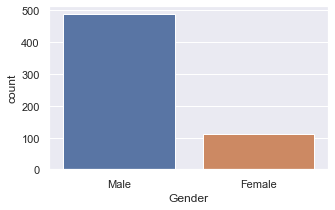

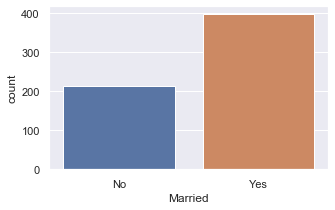

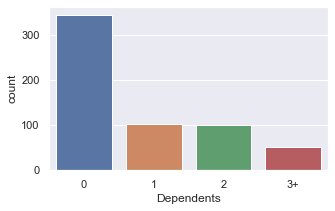

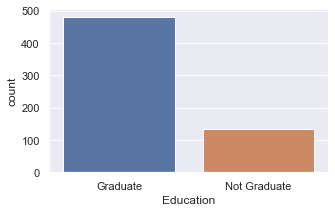

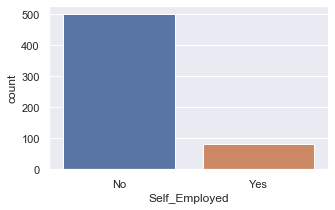

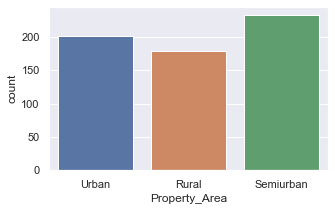

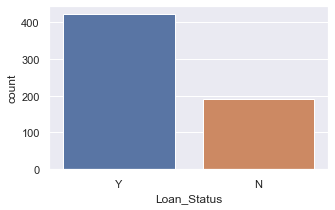

In [8]:
#categorical value
for column in df_train_cat.columns[1:]: 
    sns.set()
    fig, ax = plt.subplots()
    sns.countplot(x=column, data=df_train_cat) 
    fig.set_size_inches(5,3)

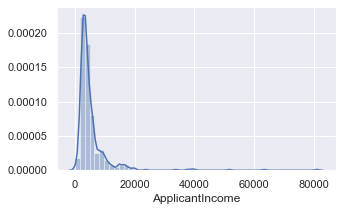

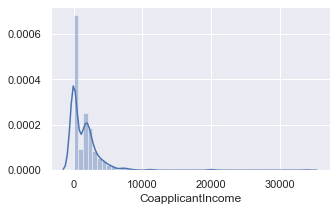

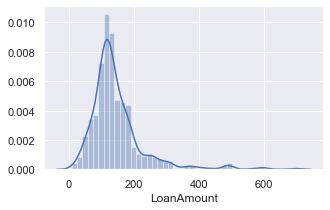

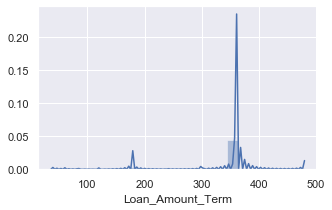

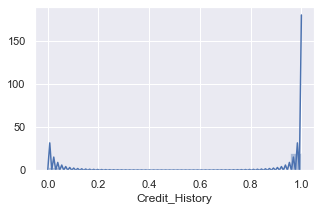

In [9]:
#numeric distribution

for column in df_train_numeric.columns:
    sns.set()
    fig, ax = plt.subplots()
    sns.distplot(df_train_numeric[column])
    fig.set_size_inches(5, 3)

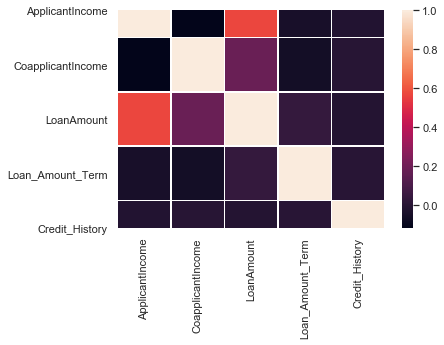

In [10]:
#correlation matrix
sns.heatmap(df_train.corr(), linewidths=.5)
fig.set_size_inches(15, 5)

<p> Key findings = Applicant Income and Co-applicant Income is highly correlated with the amount of loan borrowed </p> 
<b> Recommendation </b> <li> drop the Applicant and Co-applicant Income column and generate new ratio of loan and income to a new column </li> <li> Predict <i> Loan Amount </i> based on <i> Applicant and Co-applicant Income </i> with KNN </li> 
<li> drop other columns with na </li>
<li> encode all categorical data </li>
<li> upsample loan status 'zero' </li>

<h1> Feature Engineering </h1>

In [11]:
#predict loan amount
df_loan_predict = df_train[['ApplicantIncome', 'LoanAmount']]
df_loan_predict_test = df_loan_predict[df_loan_predict['LoanAmount'].isnull()].drop(['LoanAmount'], axis = 1)
df_loan_predict_train = df_loan_predict[df_loan_predict['LoanAmount'].notnull()]

In [12]:
df_loan_predict_train.head()

,ApplicantIncome,LoanAmount
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
5,5417,267.0


In [13]:
#create model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


x = df_loan_predict_train.drop(['LoanAmount'], axis = 1)
y = df_loan_predict_train['LoanAmount']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state  =42)

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

In [14]:
knn.score(x_test, pred_knn)

1.0

In [15]:
#fill missing value with KNN
prediction_data = knn.predict(df_loan_predict_test)
predicted_loan = pd.DataFrame({'LoanAmount': prediction_data})

df_loan_predict_test = df_loan_predict_test.reset_index(drop = True)
df_loan_predict_test['LoanAmount'] = predicted_loan

df_loan_predict_test

,ApplicantIncome,LoanAmount
0,5849,158.4
1,2275,106.6
2,4945,122.2
3,2395,104.8
4,6782,175.2
5,13650,256.6
6,4652,115.2
7,7451,170.2
8,3865,93.4
9,3992,169.6


In [16]:
#merge missing value to the df_train
df_train_test = df_train.copy()

In [17]:
#append table
df_train_test_null = df_train_test[df_loan_predict['LoanAmount'].isnull()].reset_index(drop = True)
df_train_test_notnull =  df_train_test[df_train_test['LoanAmount'].notnull()].reset_index(drop = True) #need to reset index so it can be appended
df_train_test_null = df_train_test_null.drop(['LoanAmount'], axis = 1)
df_train_test_null['LoanAmount'] = df_loan_predict_test['LoanAmount']
df_train_test_null
df_loan_clean = df_train_test_notnull.append(df_train_test_null)

In [18]:
df_loan_clean.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
Credit_History       50
Dependents           15
Education             0
Gender               13
LoanAmount            0
Loan_Amount_Term     14
Loan_ID               0
Loan_Status           0
Married               3
Property_Area         0
Self_Employed        32
dtype: int64

In [19]:
#drop row with na
df_naan_clean = df_loan_clean.dropna()

In [20]:
#drop applicant and coapplicant income and generate loan to income column
df_naan_clean['LoanToIncome'] = df_naan_clean['LoanAmount']/df_naan_clean['ApplicantIncome'] * 100
df_test['LoanToIncome'] = df_test['LoanAmount']/df_test['ApplicantIncome'] * 100
df_clean = df_naan_clean.drop(['Loan_ID'], axis = 1)
df_test = df_test.drop(['Loan_ID'], axis = 1)

In [21]:
df_clean.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,LoanToIncome
0,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,N,Yes,Rural,No,2.792930
1,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Y,Yes,Urban,Yes,2.200000
2,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Y,Yes,Urban,No,4.645761
3,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,Y,No,Urban,No,2.350000
4,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,Y,Yes,Urban,Yes,4.928927


In [22]:
df_test_naan = df_test.dropna()
df_test_naan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanToIncome
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1.923077
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.096229
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,4.160000
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,2.380952
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,7.020785


In [23]:
#encode categorical data
df_clean.select_dtypes(include = ['object']).head()

,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
0,1,Graduate,Male,N,Yes,Rural,No
1,0,Graduate,Male,Y,Yes,Urban,Yes
2,0,Not Graduate,Male,Y,Yes,Urban,No
3,0,Graduate,Male,Y,No,Urban,No
4,2,Graduate,Male,Y,Yes,Urban,Yes


In [24]:
#encode categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()

#dependent
le.fit(df_clean['Dependents'])
df_clean['Dependents'] = le.transform(df_clean['Dependents'])
df_test_naan['Dependents'] = le.transform(df_test_naan['Dependents'])

#Education
le.fit(df_clean['Education'])
df_clean['Education'] = le.transform(df_clean['Education'])
df_test_naan['Education'] = le.transform(df_test_naan['Education'])

#Gender
le.fit(df_clean['Gender'])
df_clean['Gender'] = le.transform(df_clean['Gender'])
df_test_naan['Gender'] = le.transform(df_test_naan['Gender'])

#Married
le.fit(df_clean['Married'])
df_clean['Married'] = le.transform(df_clean['Married'])
df_test_naan['Married'] = le.transform(df_test_naan['Married'])

#Property_Area
le.fit(df_clean['Property_Area'])
df_clean['Property_Area'] = le.transform(df_clean['Property_Area'])
df_test_naan['Property_Area'] = le.transform(df_test_naan['Property_Area'])

#Self_Employed
le.fit(df_clean['Self_Employed'])
df_clean['Self_Employed'] = le.transform(df_clean['Self_Employed'])
df_test_naan['Self_Employed'] = le.transform(df_test_naan['Self_Employed'])

#Loan Status
le.fit(df_clean['Loan_Status'])
df_clean['Loan_Status'] = le.transform(df_clean['Loan_Status'])

In [25]:
df_clean.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,LoanToIncome
0,4583,1508.0,1.0,1,0,1,128.0,360.0,0,1,0,0,2.792930
1,3000,0.0,1.0,0,0,1,66.0,360.0,1,1,2,1,2.200000
2,2583,2358.0,1.0,0,1,1,120.0,360.0,1,1,2,0,4.645761
3,6000,0.0,1.0,0,0,1,141.0,360.0,1,0,2,0,2.350000
4,5417,4196.0,1.0,2,0,1,267.0,360.0,1,1,2,1,4.928927


In [26]:
df_test_naan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanToIncome
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1.923077
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.096229
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,4.160000
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,2.380952
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,7.020785


In [27]:
#upsample
df_clean.Loan_Status.value_counts()

1    341
0    158
Name: Loan_Status, dtype: int64

In [28]:
#upsampling 0 loan

from sklearn.utils import resample

minority = df_clean[df_clean.Loan_Status == 0]
majority = df_clean[df_clean.Loan_Status == 1]
df_minority = resample(minority, replace = True, n_samples = 341, random_state = 303)
df_upsampled = pd.concat([majority, df_minority])
df_upsampled.Loan_Status.value_counts()

1    341
0    341
Name: Loan_Status, dtype: int64

In [29]:
#minmax
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm.fit(df_upsampled[['LoanToIncome', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

df_upsampled[['LoanToIncome', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = mm.transform(df_upsampled[['LoanToIncome', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

In [30]:
df_upsampled.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,LoanToIncome
1,0.035250,0.000000,1.0,0,0,1,0.096447,360.0,1,1,2,1,0.021164
2,0.030093,0.069687,1.0,0,1,1,0.187817,360.0,1,1,2,0,0.048431
3,0.072356,0.000000,1.0,0,0,1,0.223350,360.0,1,0,2,0,0.022836
4,0.065145,0.124006,1.0,2,0,1,0.436548,360.0,1,1,2,1,0.051587
5,0.027001,0.044803,1.0,0,1,1,0.145516,360.0,1,1,2,0,0.042034


In [31]:
#test data can't be transformed

#df_test_naan[['LoanToIncome', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = mm.transform(df_test_naan[['LoanToIncome', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

In [32]:
df_test_naan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanToIncome
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1.923077
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.096229
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,4.160000
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,2.380952
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,7.020785


In [33]:
#model building
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x = df_upsampled.drop(['Loan_Status'], axis = 1)
y = df_upsampled['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


#logreg = LogisticRegression()
#logreg.fit(x_train, y_train)
#pred_logreg = logreg.predict(x_test)

In [34]:
#svc
#clf = svm.SVC()
#clf.fit(x_train, y_train)
#pred_clf = clf.predict(x_test)

In [35]:
#random forest
#rfc = RandomForestClassifier(n_estimators = 200)
#rfc.fit(x_train, y_train)
#pred_rfc = rfc.predict(x_test)

In [36]:
#neural networks
#mlpc = MLPClassifier(hidden_layer_sizes = (6, 6, 6), max_iter = 500)
#mlpc.fit(x_train, y_train)
#pred_mlpc = mlpc.predict(x_test)

In [37]:
#Perceptorn
#prec = Perceptron()
#prec.fit(x_train, y_train)
#pred_prec = prec.predict(x_test)

In [38]:
#SGDClassifier
#sgdc = SGDClassifier()
#sgdc.fit(x_train, y_train)
#pred_sgdc = sgdc.predict(x_test)

In [39]:
#KNN
#knn = KNeighborsClassifier()
#knn.fit(x_train, y_train)
#pred_knn = knn.predict(x_test)

In [40]:
#Naive Bayes
#gauss = GaussianNB()
#gauss.fit(x_train, y_train)
#pred_gauss = gauss.predict(x_test)

In [41]:
#Decision tree
#dstree = DecisionTreeClassifier()
#dstree.fit(x_train, y_train)
#pred_dstree = dstree.predict(x_test)

In [42]:
#model evaluation

#accuracy score
#rfc_score = accuracy_score(y_test, pred_rfc)
#mlpc_score = accuracy_score(y_test, pred_mlpc)
#logreg_score = accuracy_score(y_test, pred_logreg)
#prec_score = accuracy_score(y_test, pred_prec)
#sgdc_score = accuracy_score(y_test, pred_sgdc)
#knn_score = accuracy_score(y_test, pred_knn)
#gauss_score = accuracy_score(y_test, pred_gauss)
#dstree_score = accuracy_score(y_test, pred_dstree)

#modelResult = pd.DataFrame({
    #'Model': ['Random Forest', 'Neural Networks', 'Logistic Regression', 
             #'Preceptorn', 'SGDC', 'KNN', 'Naive Bayes', 'Decisiton Tree'],
    #'Score': [rfc_score, mlpc_score, logreg_score, prec_score, sgdc_score, knn_score, gauss_score, dstree_score]
    
#})

#modelResult.sort_values(by = 'Score', ascending = False)

<p> <b> <i> Random Forest </i> and <i> Decision Tree </i> appear to be top models </b> </p>

In [43]:
#confusion matrix 
from sklearn.metrics import confusion_matrix

#print("Random Forest {}".format(confusion_matrix(y_test, pred_rfc, labels = [1, 0])))

#print("Decision Tree {}".format(confusion_matrix(y_test, pred_dstree, labels = [1, 0])))

<h2> Gradient Boosting </h2>

<h4> Gradient Boosting 1 </h4>
<p> <i> learning_rate </i> and <i> n_estimators </i> tuning </p>

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]

parameter_1 = [{'learning_rate': learning_rate,
               'n_estimators': n_estimators}]

gb_1 = GridSearchCV(estimator = gb, param_grid = parameter_1)
gb_1.fit(x_train, y_train)

def tuning_score(gradient):
    gb_1_predict = gradient.predict(x_test)
    score_1 = accuracy_score(y_test, gb_1_predict)
    print(" Score for the tuning: {:.2f}%".format(score_1 * 100))
    print("\n The Best Estimator is \n", gradient.best_estimator_)

tuning_score(gb_1)

 Score for the tuning: 85.37%

 The Best Estimator is 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=52,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


<h4> Gradient Boosting 2 </h4>
<p> <i> max_depths </i>, <i> min_samples_leaf </i>, <i> min_samples_split </i>, <i> max_features </i> </p>

Parameter Importance: please click this [link](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae).

In [45]:
max_depth = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10] #must be more than 1

parameter_2 = [{'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split': min_samples_split}]

gb_2 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators = 52, learning_rate = 0.4), param_grid = parameter_2)
gb_2.fit(x_train, y_train)
tuning_score(gb_2)

 Score for the tuning: 91.71%

 The Best Estimator is 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=52,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


<h4> Gradient Boosting 3 </h4>
<p> <i> max_features </i> </p>

In [46]:
#last best model
last_model = GradientBoostingClassifier(n_estimators = 52, learning_rate = 0.4, max_depth = 7, min_samples_leaf = 3, min_samples_split = 6)


#max features
max_features = list(range(2, x_train.shape[1])) #range dari 2 sampai jumlah feature yang dipakai

gb_3 = GridSearchCV(estimator = last_model, param_grid =[{'max_features': max_features}])
gb_3.fit(x_train, y_train)
tuning_score(gb_3)

 Score for the tuning: 89.27%

 The Best Estimator is 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features=10, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=6,
                           min_weight_fraction_leaf=0.0, n_estimators=52,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


<h2> Random Forest </h2>

<h4> Random Forest 1 </h4>
<p> <i> n_estimator, max_features </i>

In [52]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
max_features = list(range(2, x_train.shape[1]))
rf_parameter_1 = [{'n_estimators': n_estimators,
                 'max_features': max_features}]

rfc_1 = GridSearchCV(estimator = rfc, param_grid= rf_parameter_1)
rfc_1.fit(x_train, y_train)
tuning_score(rfc_1)

 Score for the tuning: 89.76%

 The Best Estimator is 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


<h4> Random Forest 2 </h4>
<p> <i> min_samples_leaf, min_samples_split </i> </p> 

In [53]:
last_model = RandomForestClassifier(max_features=5, n_estimators=450)

min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10] #must be more than 1


rf_parameter_2 = [{'min_samples_leaf': min_samples_leaf,
                  'min_samples_split': min_samples_split}]

rfc_2 = GridSearchCV(estimator = last_model, param_grid = rf_parameter_2)
rfc_2.fit(x_train, y_train)
tuning_score(rfc_2)

 Score for the tuning: 92.68%

 The Best Estimator is 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
